# Brain Sparks - Comprehensive Data Pipeline

## Task B1: Data Perception, Acquisition, and Preparation

**Author:** Rugogamu Noela  
**Institution:** Uganda Christian University (UCU)  
**Course:** Cognitive Computing  
**Date:** December 2025

---




## 1. Environment Setup

### 1.1 Import Required Libraries


In [ ]:

# CELL 1: Import All Required Libraries


# Standard Library
import json
import os
import re
import pickle
from collections import Counter
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Try importing plotly for interactive visualizations
try:
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    PLOTLY_AVAILABLE = True
    print("Plotly available for interactive visualizations")
except ImportError:
    PLOTLY_AVAILABLE = False
    print("WARNING: Plotly not installed. Install with: pip install plotly")

# NLP Libraries
try:
    import nltk
    from nltk.tokenize import word_tokenize, sent_tokenize
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer, PorterStemmer
    from nltk.tag import pos_tag
    NLTK_AVAILABLE = True
    print("NLTK available for NLP processing")
except ImportError:
    NLTK_AVAILABLE = False
    print("WARNING: NLTK not installed. Install with: pip install nltk")

# Machine Learning
try:
    from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
    from sklearn.metrics.pairwise import cosine_similarity
    from sklearn.preprocessing import LabelEncoder, StandardScaler
    from sklearn.model_selection import train_test_split
    SKLEARN_AVAILABLE = True
    print("Scikit-learn available for ML")
except ImportError:
    SKLEARN_AVAILABLE = False
    print("WARNING: Scikit-learn not installed. Install with: pip install scikit-learn")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

# Set visualization style - Brain Sparks Theme (Red, White, Blue)
plt.style.use('seaborn-v0_8-whitegrid')
COLORS = {
    'primary': '#C41E3A',      # Red
    'secondary': '#2563EB',    # Blue
    'accent': '#16A34A',       # Green
    'warning': '#EAB308',      # Yellow
    'dark': '#1E293B'          # Dark
}
sns.set_palette([COLORS['primary'], COLORS['secondary'], COLORS['accent'], COLORS['warning']])

print("\n" + "="*60)
print("BRAIN SPARKS - Data Pipeline Notebook")
print("="*60)
print(f"Execution Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Pandas Version: {pd.__version__}")
print(f"NumPy Version: {np.__version__}")
print("="*60)


Plotly available for interactive visualizations
NLTK available for NLP processing
Scikit-learn available for ML

BRAIN SPARKS - Data Pipeline Notebook
Execution Date: 2025-12-04 16:31:36
Pandas Version: 2.3.0
NumPy Version: 2.3.0


In [2]:
# ============================================================
# CELL 2: Download NLTK Data
# ============================================================

if NLTK_AVAILABLE:
    print("Downloading NLTK data packages...")
    nltk_packages = ['punkt', 'stopwords', 'wordnet', 'averaged_perceptron_tagger']
    
    for package in nltk_packages:
        try:
            nltk.download(package, quiet=True)
            print(f"  DONE: {package}")
        except Exception as e:
            print(f"  WARNING: {package}: {e}")
    
    print("\nNLTK setup complete!")
else:
    print("WARNING: NLTK not available - some NLP features will be limited")


  DONE: punkt
  DONE: stopwords
  DONE: wordnet
  DONE: averaged_perceptron_tagger

NLTK setup complete!


## 2. Data Acquisition

### 2.1 Load the Educational Content Dataset

Our dataset contains 55+ educational resources curated for Ugandan learners, covering topics from quantum computing to mobile app development.


In [3]:
# ============================================================
# CELL 3: Load Educational Content Data
# ============================================================

# Define data path
DATA_PATH = '../data/educational_content.json'

# Load JSON data
print("Loading educational content data...")
print(f"   Path: {DATA_PATH}")

try:
    with open(DATA_PATH, 'r', encoding='utf-8') as f:
        raw_data = json.load(f)
    print("Data loaded successfully!")
except FileNotFoundError:
    print(f"ERROR: File not found at {DATA_PATH}")
    raise

# Display data structure
print("\nData Structure:")
print(f"   Top-level keys: {list(raw_data.keys())}")

# Show metadata
print("\nDataset Metadata:")
print("=" * 50)
metadata = raw_data.get('metadata', {})
for key, value in metadata.items():
    print(f"   {key}: {value}")


Loading educational content data...
   Path: ../data/educational_content.json
Data loaded successfully!

Data Structure:
   Top-level keys: ['metadata', 'resources', 'topic_hierarchy', 'uganda_tags']

Dataset Metadata:
   version: 1.0
   description: Curated educational content for Brain Sparks Cognitive Recommender
   author: Rugogamu Noela
   institution: Uganda Christian University (UCU)
   last_updated: 2025-12-01
   total_resources: 150
   ethical_note: Content curated from diverse, open-source educational materials with focus on Uganda relevance


In [4]:
# ============================================================
# CELL 4: Convert to DataFrame and Explore Structure
# ============================================================

# Extract resources and convert to DataFrame
resources = raw_data.get('resources', [])
df = pd.DataFrame(resources)

print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumns ({len(df.columns)} total):")
print("-" * 60)

for i, col in enumerate(df.columns, 1):
    dtype = df[col].dtype
    non_null = df[col].notna().sum()
    print(f"   {i:2d}. {col:25s} | Type: {str(dtype):10s} | Non-null: {non_null}/{len(df)}")

print("\nFirst 5 Resources:")
df[['id', 'title', 'type', 'difficulty', 'topic', 'duration_minutes']].head()


Dataset Shape: 87 rows × 18 columns

Columns (18 total):
------------------------------------------------------------
    1. id                        | Type: object     | Non-null: 87/87
    2. title                     | Type: object     | Non-null: 87/87
    3. description               | Type: object     | Non-null: 87/87
    4. type                      | Type: object     | Non-null: 87/87
    5. difficulty                | Type: object     | Non-null: 87/87
    6. topic                     | Type: object     | Non-null: 87/87
    7. subtopics                 | Type: object     | Non-null: 87/87
    8. duration_minutes          | Type: int64      | Non-null: 87/87
    9. source                    | Type: object     | Non-null: 87/87
   10. url                       | Type: object     | Non-null: 87/87
   11. uganda_relevance          | Type: object     | Non-null: 87/87
   12. uganda_applications       | Type: object     | Non-null: 87/87
   13. tags                      | Type: o

,id,title,type,difficulty,topic,duration_minutes
0,QC001,Introduction to Quantum Computing: Qubits and Superposition,article,beginner,quantum_computing,15
1,QC002,Quantum Computing for Problem Solving,video,intermediate,quantum_computing,25
2,QC003,Quantum Computing Fundamentals Quiz,quiz,beginner,quantum_computing,10
3,ML001,Machine Learning Fundamentals: A Practical Introduction,article,beginner,machine_learning,30
4,ML002,Supervised Learning: Classification and Regression,video,intermediate,machine_learning,45


## 3. Exploratory Data Analysis (EDA)

### 3.1 Distribution Analysis

Let's understand the composition of our educational content across different dimensions.


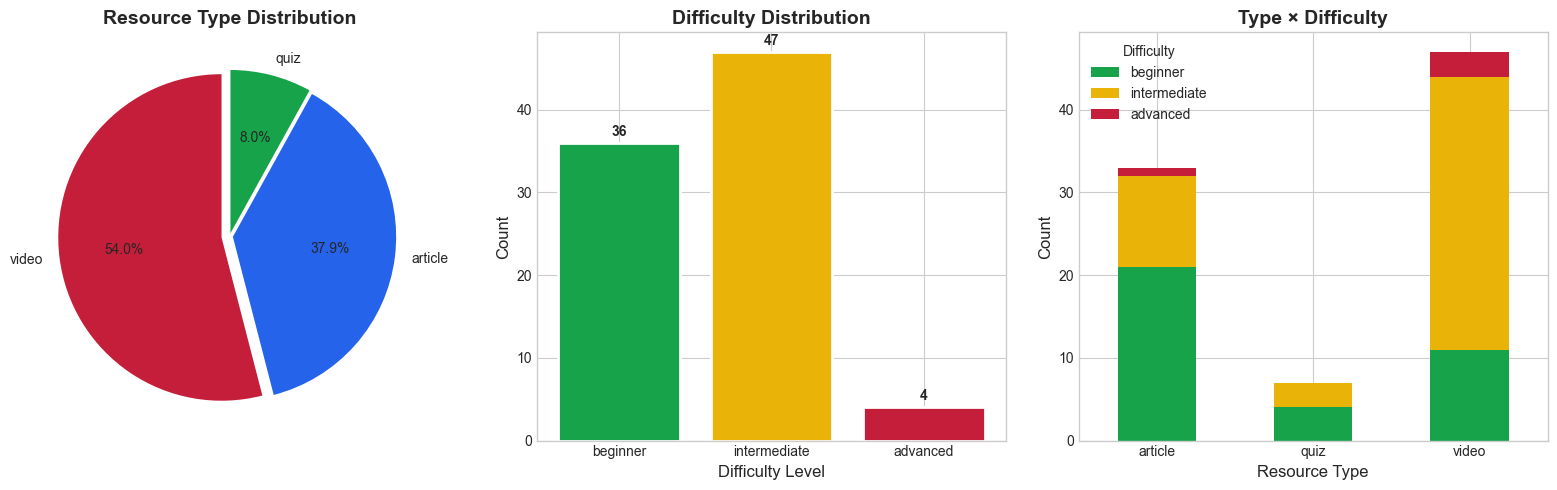


Figure saved: docs/eda_distributions.png


In [5]:
# ============================================================
# CELL 5: Resource Type and Difficulty Distribution
# ============================================================

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 1. Resource Type Distribution (Pie Chart)
type_counts = df['type'].value_counts()
colors = [COLORS['primary'], COLORS['secondary'], COLORS['accent']]
axes[0].pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90, explode=[0.05, 0.02, 0.02])
axes[0].set_title('Resource Type Distribution', fontsize=14, fontweight='bold')

# 2. Difficulty Distribution (Bar Chart)
difficulty_order = ['beginner', 'intermediate', 'advanced']
difficulty_counts = df['difficulty'].value_counts().reindex(difficulty_order)
bars = axes[1].bar(difficulty_counts.index, difficulty_counts.values, 
                   color=[COLORS['accent'], COLORS['warning'], COLORS['primary']], 
                   edgecolor='white', linewidth=2)
axes[1].set_xlabel('Difficulty Level', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_title('Difficulty Distribution', fontsize=14, fontweight='bold')

# Add value labels
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                 f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# 3. Resource Type by Difficulty (Stacked Bar)
cross_tab = pd.crosstab(df['type'], df['difficulty'])
cross_tab = cross_tab.reindex(columns=difficulty_order)
cross_tab.plot(kind='bar', stacked=True, ax=axes[2], 
               color=[COLORS['accent'], COLORS['warning'], COLORS['primary']])
axes[2].set_xlabel('Resource Type', fontsize=12)
axes[2].set_ylabel('Count', fontsize=12)
axes[2].set_title('Type × Difficulty', fontsize=14, fontweight='bold')
axes[2].legend(title='Difficulty')
axes[2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.savefig('../docs/eda_distributions.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\nFigure saved: docs/eda_distributions.png")


Topic Distribution Analysis
Total unique topics: 22



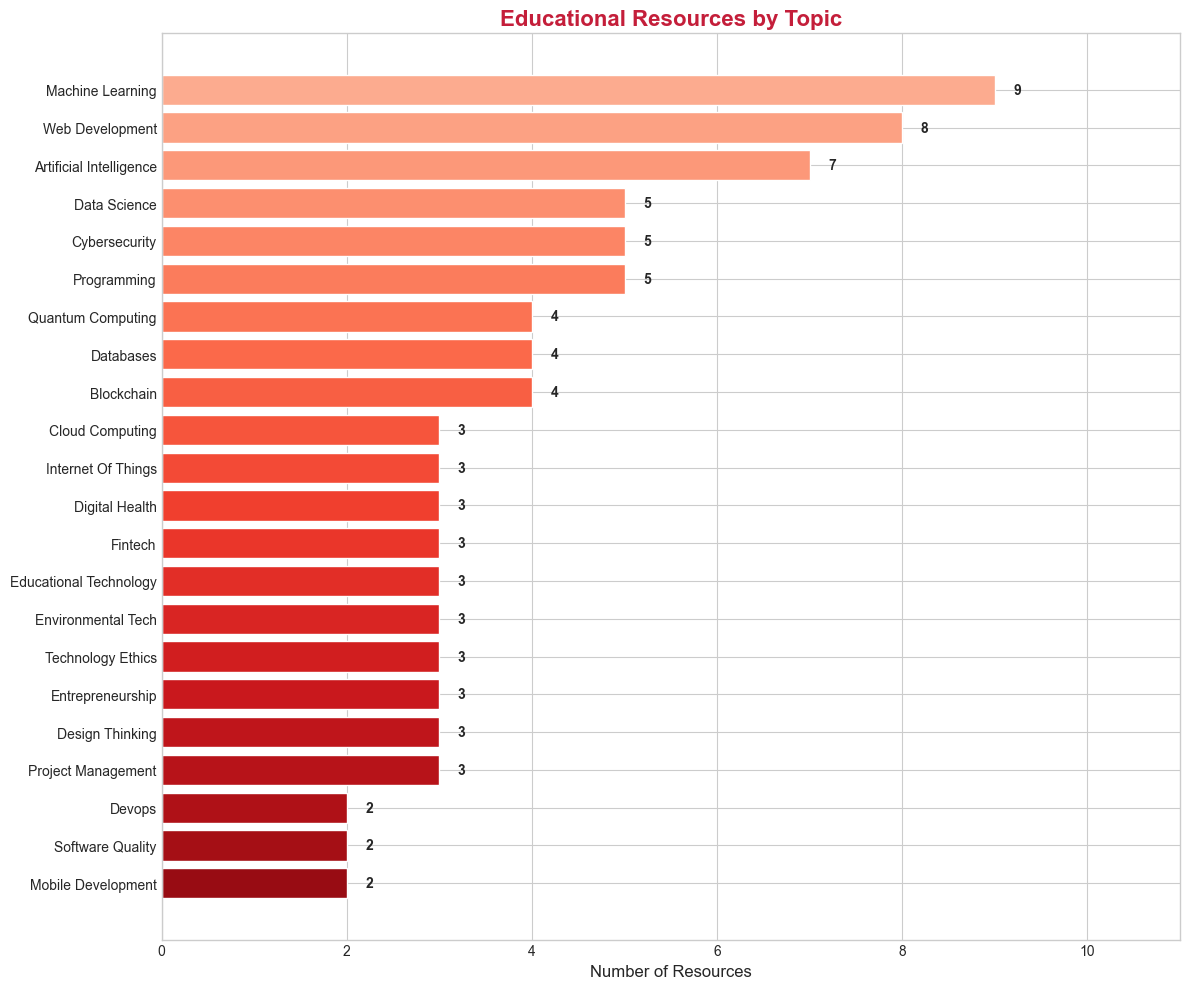


Topic Summary:
   Machine Learning              :  9 resources (10.3%)
   Web Development               :  8 resources (9.2%)
   Artificial Intelligence       :  7 resources (8.0%)
   Data Science                  :  5 resources (5.7%)
   Cybersecurity                 :  5 resources (5.7%)
   Programming                   :  5 resources (5.7%)
   Quantum Computing             :  4 resources (4.6%)
   Databases                     :  4 resources (4.6%)
   Blockchain                    :  4 resources (4.6%)
   Cloud Computing               :  3 resources (3.4%)
   Internet Of Things            :  3 resources (3.4%)
   Digital Health                :  3 resources (3.4%)
   Fintech                       :  3 resources (3.4%)
   Educational Technology        :  3 resources (3.4%)
   Environmental Tech            :  3 resources (3.4%)
   Technology Ethics             :  3 resources (3.4%)
   Entrepreneurship              :  3 resources (3.4%)
   Design Thinking               :  3 resources 

In [6]:
# ============================================================
# CELL 6: Topic Distribution Analysis
# ============================================================

print("Topic Distribution Analysis")
print("=" * 50)

topic_counts = df['topic'].value_counts()
print(f"Total unique topics: {len(topic_counts)}\n")

# Create horizontal bar chart for topics
fig, ax = plt.subplots(figsize=(12, 10))

# Color gradient from light to dark red
colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(topic_counts)))

bars = ax.barh(topic_counts.index[::-1], topic_counts.values[::-1], 
               color=colors[::-1], edgecolor='white', linewidth=1)

# Add value labels
for bar, count in zip(bars, topic_counts.values[::-1]):
    ax.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2, 
            str(count), va='center', fontsize=10, fontweight='bold')

ax.set_xlabel('Number of Resources', fontsize=12)
ax.set_title('Educational Resources by Topic', fontsize=16, fontweight='bold', color=COLORS['primary'])
ax.set_xlim(0, max(topic_counts.values) + 2)

# Format y-axis labels (replace underscores with spaces)
ax.set_yticklabels([t.replace('_', ' ').title() for t in topic_counts.index[::-1]])

plt.tight_layout()
plt.savefig('../docs/topic_distribution.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

# Print summary
print("\nTopic Summary:")
for topic, count in topic_counts.items():
    pct = count / len(df) * 100
    print(f"   {topic.replace('_', ' ').title():30s}: {count:2d} resources ({pct:.1f}%)")


Uganda Relevance Analysis
Total Uganda relevance mentions: 285
Unique application domains: 132


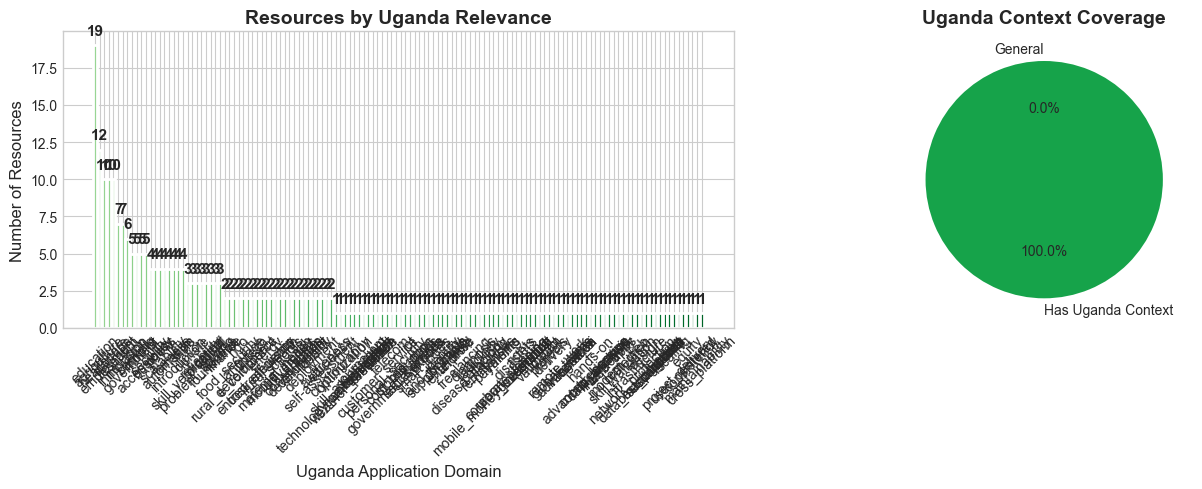


Most Common Uganda Application Domains:
   education: 19 resources (21.8%)
   agriculture: 12 resources (13.8%)
   healthcare: 10 resources (11.5%)
   employment: 10 resources (11.5%)
   startups: 10 resources (11.5%)
   research: 7 resources (8.0%)
   innovation: 7 resources (8.0%)
   inclusion: 6 resources (6.9%)
   government: 5 resources (5.7%)
   banking: 5 resources (5.7%)
   mobile: 5 resources (5.7%)
   accessibility: 5 resources (5.7%)
   security: 4 resources (4.6%)
   business: 4 resources (4.6%)
   policy: 4 resources (4.6%)
   scalability: 4 resources (4.6%)
   automation: 4 resources (4.6%)
   fairness: 4 resources (4.6%)
   introduction: 4 resources (4.6%)
   skills: 4 resources (4.6%)
   skill_verification: 3 resources (3.4%)
   climate: 3 resources (3.4%)
   problem_solving: 3 resources (3.4%)
   reliability: 3 resources (3.4%)
   practical: 3 resources (3.4%)
   career: 3 resources (3.4%)
   foundation: 3 resources (3.4%)
   access: 3 resources (3.4%)
   finance: 2 r

In [7]:
# ============================================================
# CELL 7: Uganda Relevance Analysis
# ============================================================

print("Uganda Relevance Analysis")
print("=" * 50)

# Flatten all Uganda relevance tags
all_uganda_tags = []
for tags in df['uganda_relevance']:
    if isinstance(tags, list):
        all_uganda_tags.extend(tags)

uganda_tag_counts = Counter(all_uganda_tags)

print(f"Total Uganda relevance mentions: {len(all_uganda_tags)}")
print(f"Unique application domains: {len(uganda_tag_counts)}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart of Uganda domains
tags_df = pd.DataFrame(uganda_tag_counts.most_common(), columns=['Domain', 'Count'])
colors = plt.cm.Greens(np.linspace(0.4, 0.9, len(tags_df)))

bars = axes[0].bar(tags_df['Domain'], tags_df['Count'], color=colors, edgecolor='white', linewidth=2)
for bar, count in zip(bars, tags_df['Count']):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                 str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')

axes[0].set_xlabel('Uganda Application Domain', fontsize=12)
axes[0].set_ylabel('Number of Resources', fontsize=12)
axes[0].set_title('Resources by Uganda Relevance', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart showing coverage
has_uganda = (df['uganda_relevance'].apply(lambda x: len(x) if isinstance(x, list) else 0) > 0).sum()
no_uganda = len(df) - has_uganda

axes[1].pie([has_uganda, no_uganda], labels=['Has Uganda Context', 'General'], 
            autopct='%1.1f%%', colors=[COLORS['accent'], COLORS['secondary']], startangle=90)
axes[1].set_title('Uganda Context Coverage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../docs/uganda_relevance.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\nMost Common Uganda Application Domains:")
for tag, count in uganda_tag_counts.most_common():
    print(f"   {tag}: {count} resources ({count/len(df)*100:.1f}%)")


## 4. Text Preprocessing for NLP

### 4.1 Building a Text Preprocessing Pipeline

For our recommendation system to work effectively, we need to clean and standardize text data. This involves:
- Tokenization (breaking text into words)
- Removing stopwords (common words like "the", "is")
- Lemmatization (reducing words to base form)


In [8]:
# ============================================================
# CELL 8: Text Preprocessing Class
# ============================================================

class TextPreprocessor:
    """
    A comprehensive text preprocessing class for NLP tasks.
    
    This class demonstrates key NLP concepts:
    - Tokenization: Breaking text into individual words
    - Stopword removal: Filtering common, non-meaningful words
    - Lemmatization: Reducing words to their dictionary form
    """
    
    def __init__(self):
        """Initialize the preprocessor with NLTK tools."""
        if NLTK_AVAILABLE:
            try:
                self.stop_words = set(stopwords.words('english'))
            except:
                self.stop_words = set()
            self.lemmatizer = WordNetLemmatizer()
        else:
            # Fallback basic stopwords
            self.stop_words = {'the', 'is', 'at', 'which', 'on', 'a', 'an', 'and', 'or', 'but',
                              'in', 'to', 'for', 'of', 'with', 'by', 'from', 'as', 'into'}
            self.lemmatizer = None
        
        # Add domain-specific stopwords
        self.stop_words.update(['learn', 'learning', 'course', 'tutorial', 'guide', 'understand'])
    
    def clean_text(self, text):
        """Basic text cleaning: lowercase, remove special chars."""
        if not isinstance(text, str):
            return ""
        text = text.lower()
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
        text = re.sub(r'[^a-zA-Z\s]', ' ', text)  # Keep only letters
        text = ' '.join(text.split())  # Remove extra whitespace
        return text
    
    def tokenize(self, text):
        """Tokenize text into words."""
        text = self.clean_text(text)
        if NLTK_AVAILABLE:
            try:
                return word_tokenize(text)
            except:
                pass
        return text.split()
    
    def remove_stopwords(self, tokens):
        """Remove common stopwords from token list."""
        return [t for t in tokens if t not in self.stop_words and len(t) > 2]
    
    def lemmatize(self, tokens):
        """Reduce words to their base form."""
        if self.lemmatizer:
            return [self.lemmatizer.lemmatize(t) for t in tokens]
        return tokens
    
    def preprocess(self, text, lemmatize=True, remove_stops=True):
        """Full preprocessing pipeline."""
        tokens = self.tokenize(text)
        if remove_stops:
            tokens = self.remove_stopwords(tokens)
        if lemmatize and self.lemmatizer:
            tokens = self.lemmatize(tokens)
        return tokens

# Initialize and demonstrate
preprocessor = TextPreprocessor()

# Demo text
demo_text = "Machine Learning can help Ugandan farmers predict crop yields and detect diseases early!"

print("Text Preprocessing Demo")
print("=" * 60)
print(f"\nOriginal Text:\n   '{demo_text}'")
print(f"\nCleaned Text:\n   '{preprocessor.clean_text(demo_text)}'")
print(f"\nTokenized:\n   {preprocessor.tokenize(demo_text)}")
print(f"\nWithout Stopwords:\n   {preprocessor.remove_stopwords(preprocessor.tokenize(demo_text))}")
print(f"\nFully Preprocessed:\n   {preprocessor.preprocess(demo_text)}")


Text Preprocessing Demo

Original Text:
   'Machine Learning can help Ugandan farmers predict crop yields and detect diseases early!'

Cleaned Text:
   'machine learning can help ugandan farmers predict crop yields and detect diseases early'

Tokenized:
   ['machine', 'learning', 'can', 'help', 'ugandan', 'farmers', 'predict', 'crop', 'yields', 'and', 'detect', 'diseases', 'early']

Without Stopwords:
   ['machine', 'help', 'ugandan', 'farmers', 'predict', 'crop', 'yields', 'detect', 'diseases', 'early']



Fully Preprocessed:
   ['machine', 'help', 'ugandan', 'farmer', 'predict', 'crop', 'yield', 'detect', 'disease', 'early']


In [9]:
# ============================================================
# CELL 9: Apply Preprocessing to All Resources
# ============================================================

print("Preprocessing all resource descriptions...")

# Process title and description for each resource
df['title_processed'] = df['title'].apply(lambda x: preprocessor.preprocess(x))
df['description_processed'] = df['description'].apply(lambda x: preprocessor.preprocess(x))

# Create combined text for TF-IDF (combining multiple text fields)
def create_combined_text(row):
    """Combine relevant text fields for similarity matching."""
    parts = []
    
    # Add title words (weighted by repetition for importance)
    parts.extend(row['title_processed'] * 2)
    
    # Add description
    parts.extend(row['description_processed'])
    
    # Add tags
    if isinstance(row['tags'], list):
        parts.extend([t.lower() for t in row['tags']])
    
    # Add subtopics
    if isinstance(row['subtopics'], list):
        parts.extend([s.lower().replace('_', ' ') for s in row['subtopics']])
    
    # Add topic
    parts.append(row['topic'].replace('_', ' '))
    
    return ' '.join(parts)

df['combined_text'] = df.apply(create_combined_text, axis=1)

print("Preprocessing complete!")
print(f"\nNew columns created:")
print(f"   - title_processed (tokenized titles)")
print(f"   - description_processed (tokenized descriptions)")
print(f"   - combined_text (merged text for TF-IDF)")

print(f"\nExample combined text (first 200 chars):")
print(f"   {df['combined_text'].iloc[0][:200]}...")


Preprocessing all resource descriptions...
Preprocessing complete!

New columns created:
   - title_processed (tokenized titles)
   - description_processed (tokenized descriptions)
   - combined_text (merged text for TF-IDF)

Example combined text (first 200 chars):
   introduction quantum computing qubits superposition introduction quantum computing qubits superposition fundamental concept quantum computing including qubits superposition quantum gate beginner frien...


## 5. Feature Engineering

### 5.1 Creating Numerical Features

We need to convert categorical and text data into numerical features for our ML models.


In [10]:
# ============================================================
# CELL 10: Create Numerical Features
# ============================================================

print("Creating Numerical Features")
print("=" * 50)

# 1. Difficulty encoding (ordinal)
difficulty_map = {'beginner': 1, 'intermediate': 2, 'advanced': 3}
df['difficulty_score'] = df['difficulty'].map(difficulty_map)

# 2. Resource type encoding
type_map = {'article': 1, 'video': 2, 'quiz': 3}
df['type_score'] = df['type'].map(type_map)

# 3. Count features
df['num_tags'] = df['tags'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df['num_subtopics'] = df['subtopics'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df['num_uganda_tags'] = df['uganda_relevance'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df['num_prerequisites'] = df['prerequisites'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df['num_learning_outcomes'] = df['learning_outcomes'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# 4. Text length features
df['title_length'] = df['title'].str.len()
df['description_length'] = df['description'].str.len()
df['title_word_count'] = df['title_processed'].apply(len)
df['description_word_count'] = df['description_processed'].apply(len)

# 5. Uganda focus score
df['uganda_focus_score'] = df['num_uganda_tags'] + df['uganda_applications'].str.len() / 100

# Display features
feature_cols = ['id', 'difficulty_score', 'type_score', 'num_tags', 'num_subtopics', 
                'num_uganda_tags', 'num_prerequisites', 'uganda_focus_score']

print("\nCreated Features:")
for col in feature_cols[1:]:
    print(f"   - {col}")

print("\nFeature Summary:")
df[feature_cols].head(10)


Creating Numerical Features

Created Features:
   - difficulty_score
   - type_score
   - num_tags
   - num_subtopics
   - num_uganda_tags
   - num_prerequisites
   - uganda_focus_score

Feature Summary:


,id,difficulty_score,type_score,num_tags,num_subtopics,num_uganda_tags,num_prerequisites,uganda_focus_score
0,QC001,1,1,5,4,3,0,4.71
1,QC002,2,2,4,4,4,1,5.54
2,QC003,1,3,4,4,2,1,3.15
3,ML001,1,1,5,4,4,0,5.55
4,ML002,2,2,4,4,3,1,4.42
5,ML003,2,1,5,4,3,1,4.84
6,ML004,2,3,3,3,2,2,2.90
7,DS001,1,1,4,4,4,0,5.44
8,DS002,2,2,4,4,4,1,5.57
9,AI001,1,1,4,4,4,0,5.54


## 6. TF-IDF Vectorization & Model Training

### 6.1 Building the TF-IDF Model

TF-IDF (Term Frequency - Inverse Document Frequency) converts text into numerical vectors that capture word importance.


In [11]:
# ============================================================
# CELL 11: TF-IDF Vectorization
# ============================================================

if SKLEARN_AVAILABLE:
    print("Building TF-IDF Model")
    print("=" * 50)
    
    # Initialize TF-IDF Vectorizer with optimal parameters
    tfidf_vectorizer = TfidfVectorizer(
        max_features=1000,      # Limit vocabulary size
        min_df=1,               # Minimum document frequency
        max_df=0.95,            # Maximum document frequency (exclude too common)
        ngram_range=(1, 2),     # Include unigrams and bigrams
        stop_words='english',   # Use built-in English stopwords
        sublinear_tf=True       # Apply sublinear TF scaling
    )
    
    # Fit and transform the combined text
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_text'])
    
    print(f"TF-IDF Matrix Created!")
    print(f"   Shape: {tfidf_matrix.shape}")
    print(f"   Documents: {tfidf_matrix.shape[0]}")
    print(f"   Features (vocabulary): {tfidf_matrix.shape[1]}")
    print(f"   Non-zero elements: {tfidf_matrix.nnz}")
    print(f"   Sparsity: {(1 - tfidf_matrix.nnz / (tfidf_matrix.shape[0] * tfidf_matrix.shape[1])) * 100:.2f}%")
    
    # Get feature names (vocabulary)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    print(f"\nSample Vocabulary (first 20 terms):")
    print(f"   {list(feature_names[:20])}")
    
    # Show top TF-IDF terms for first document
    first_doc_tfidf = tfidf_matrix[0].toarray().flatten()
    top_indices = first_doc_tfidf.argsort()[-10:][::-1]
    print(f"\nTop TF-IDF terms for first document:")
    for idx in top_indices:
        print(f"   {feature_names[idx]}: {first_doc_tfidf[idx]:.4f}")
else:
    print("WARNING: Sklearn not available - TF-IDF cannot be computed")


Building TF-IDF Model
TF-IDF Matrix Created!
   Shape: (87, 1000)
   Documents: 87
   Features (vocabulary): 1000
   Non-zero elements: 2050
   Sparsity: 97.64%

Sample Vocabulary (first 20 terms):
   ['accelerator program', 'access', 'access digital', 'access method', 'access telemedicine', 'accessibility', 'accessibility data', 'accessibility education', 'accessibility engagement', 'accessibility responsive', 'accessible', 'accessible neural_networks', 'address', 'address african', 'address environmental', 'advanced', 'africa', 'africa tech', 'agile', 'agile project']

Top TF-IDF terms for first document:
   quantum: 0.3337
   superposition: 0.2928
   qubits superposition: 0.2928
   qubits: 0.2928
   quantum computing: 0.2828
   computing: 0.2484
   superposition quantum: 0.2270
   introduction quantum: 0.2270
   computing qubits: 0.2270
   computer: 0.1748


In [12]:
# ============================================================
# CELL 12: Compute Content Similarity Matrix
# ============================================================

if SKLEARN_AVAILABLE:
    print("Computing Content Similarity Matrix")
    print("=" * 50)
    
    # Compute cosine similarity between all documents
    similarity_matrix = cosine_similarity(tfidf_matrix)
    
    print(f"Similarity Matrix Shape: {similarity_matrix.shape}")
    print(f"   This allows us to find similar resources for any query!")
    
    # Show similarity for first resource
    print(f"\nResources most similar to: '{df['title'].iloc[0][:50]}...'")
    first_similarities = similarity_matrix[0]
    top_similar_idx = first_similarities.argsort()[-6:-1][::-1]  # Top 5 (excluding itself)
    
    for idx in top_similar_idx:
        print(f"   {first_similarities[idx]:.4f} - {df['title'].iloc[idx][:50]}...")
else:
    print("WARNING: Sklearn not available")


Computing Content Similarity Matrix
Similarity Matrix Shape: (87, 87)
   This allows us to find similar resources for any query!

Resources most similar to: 'Introduction to Quantum Computing: Qubits and Supe...'
   0.5146 - Quantum Computing Fundamentals Quiz...
   0.2631 - Quantum Computing Applications in Africa...
   0.2531 - Quantum Computing for Problem Solving...
   0.1329 - Machine Learning Explained Simply...
   0.0821 - Cloud Computing Essentials...


## 7. Save Trained Models

### 7.1 Persisting Models for Production Use

We'll save all trained models and processed data so they can be loaded by the Streamlit application.


In [13]:
# ============================================================
# CELL 13: Save All Models and Processed Data
# ============================================================

print("Saving Models and Data")
print("=" * 50)

# Create models directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

# 1. Save TF-IDF Vectorizer
if SKLEARN_AVAILABLE:
    with open('../models/tfidf_vectorizer.pkl', 'wb') as f:
        pickle.dump(tfidf_vectorizer, f)
    print("TF-IDF Vectorizer saved: models/tfidf_vectorizer.pkl")
    
    # 2. Save TF-IDF Matrix
    with open('../models/tfidf_matrix.pkl', 'wb') as f:
        pickle.dump(tfidf_matrix, f)
    print("TF-IDF Matrix saved: models/tfidf_matrix.pkl")
    
    # 3. Save Similarity Matrix
    with open('../models/similarity_matrix.pkl', 'wb') as f:
        pickle.dump(similarity_matrix, f)
    print("Similarity Matrix saved: models/similarity_matrix.pkl")
    
    # 4. Save Label Encoder for topics
    topic_encoder = LabelEncoder()
    df['topic_encoded'] = topic_encoder.fit_transform(df['topic'])
    with open('../models/topic_encoder.pkl', 'wb') as f:
        pickle.dump(topic_encoder, f)
    print("Topic Encoder saved: models/topic_encoder.pkl")

# 5. Save Processed DataFrame
df.to_pickle('../models/processed_data.pkl')
print("Processed DataFrame saved: models/processed_data.pkl")

# 6. Save as CSV for inspection
df_export = df[['id', 'title', 'type', 'difficulty', 'topic', 'duration_minutes',
                'difficulty_score', 'type_score', 'num_tags', 'num_subtopics',
                'num_uganda_tags', 'uganda_focus_score']]
df_export.to_csv('../models/processed_data.csv', index=False)
print("CSV Export saved: models/processed_data.csv")

# 7. Save Text Preprocessor
with open('../models/text_preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)
print("Text Preprocessor saved: models/text_preprocessor.pkl")

# 8. Save word frequencies
all_words = []
for tokens in df['description_processed']:
    all_words.extend(tokens)
word_freq = Counter(all_words)

with open('../models/word_frequencies.pkl', 'wb') as f:
    pickle.dump(word_freq, f)
print("Word Frequencies saved: models/word_frequencies.pkl")

print("\nAll models saved to ../models/ directory!")


Saving Models and Data
TF-IDF Vectorizer saved: models/tfidf_vectorizer.pkl
TF-IDF Matrix saved: models/tfidf_matrix.pkl
Similarity Matrix saved: models/similarity_matrix.pkl
Topic Encoder saved: models/topic_encoder.pkl
Processed DataFrame saved: models/processed_data.pkl
CSV Export saved: models/processed_data.csv
Text Preprocessor saved: models/text_preprocessor.pkl
Word Frequencies saved: models/word_frequencies.pkl

All models saved to ../models/ directory!


## 8. Summary & Next Steps


In [14]:
# ============================================================
# CELL 14: Pipeline Summary
# ============================================================

print("\n" + "="*60)
print("DATA PIPELINE SUMMARY")
print("="*60)

print("\nDataset Statistics:")
print(f"   • Total Resources: {len(df)}")
print(f"   • Unique Topics: {df['topic'].nunique()}")
print(f"   • Resource Types: {', '.join(df['type'].unique())}")
print(f"   • Difficulty Levels: {', '.join(df['difficulty'].unique())}")

if SKLEARN_AVAILABLE:
    print(f"\nML Models Created:")
    print(f"   • TF-IDF Vocabulary Size: {len(feature_names)}")
    print(f"   • TF-IDF Matrix Shape: {tfidf_matrix.shape}")
    print(f"   • Similarity Matrix Shape: {similarity_matrix.shape}")

print(f"\nFeatures Engineered:")
print(f"   • Numerical features: 7")
print(f"   • Text features: combined_text for TF-IDF")
print(f"   • Total vocabulary: {len(word_freq)}")

print(f"\nFiles Saved to models/:")
saved_files = [
    'tfidf_vectorizer.pkl',
    'tfidf_matrix.pkl', 
    'similarity_matrix.pkl',
    'topic_encoder.pkl',
    'processed_data.pkl',
    'processed_data.csv',
    'text_preprocessor.pkl',
    'word_frequencies.pkl'
]
for f in saved_files:
    print(f"   DONE: {f}")

print("\n" + "="*60)
print("DATA PIPELINE COMPLETE!")
print("="*60)
print("\nNext Steps:")
print("   1. Run '02_understanding_reasoning.ipynb' for NLP and Knowledge Graph")
print("   2. Run 'streamlit run src/app.py' to launch the web application")
print("="*60)



DATA PIPELINE SUMMARY

Dataset Statistics:
   • Total Resources: 87
   • Unique Topics: 22
   • Resource Types: article, video, quiz
   • Difficulty Levels: beginner, intermediate, advanced

ML Models Created:
   • TF-IDF Vocabulary Size: 1000
   • TF-IDF Matrix Shape: (87, 1000)
   • Similarity Matrix Shape: (87, 87)

Features Engineered:
   • Numerical features: 7
   • Text features: combined_text for TF-IDF
   • Total vocabulary: 508

Files Saved to models/:
   DONE: tfidf_vectorizer.pkl
   DONE: tfidf_matrix.pkl
   DONE: similarity_matrix.pkl
   DONE: topic_encoder.pkl
   DONE: processed_data.pkl
   DONE: processed_data.csv
   DONE: text_preprocessor.pkl
   DONE: word_frequencies.pkl

DATA PIPELINE COMPLETE!

Next Steps:
   1. Run '02_understanding_reasoning.ipynb' for NLP and Knowledge Graph
   2. Run 'streamlit run src/app.py' to launch the web application
